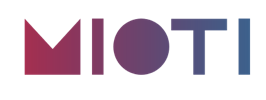
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Challenge S7 : Control de salud

## Objetivo

El objetivo de este challenge es entrenar un modelo para determinar el estado de salud de una persona en funcion de unas variables tomadas de la monitorizacion de 50 personas durante 31 dias tomando muestras cada hora del numero de pulsaciones por minuto, asi como el sexo, la edad y el peso de la persona. La etiqueta a predecir es el estado de salud (OK o BAD)en cada hora.


In [1]:
import datetime
from datetime import timedelta
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC




### Entrenamiento del modelo

Dispones de un dataset `health.csv` que contiene varias variables y su relación con el estado de salud del paciente (emergencia o situación normal). 

Analiza, preprocesalo y entrena un modelo para luego utilizarlo más adelante. Aplica lo consideres más relevante para este caso de lo que has aprendido durante la asignatura.

### Carga del dataset

In [2]:
df = pd.read_csv('health_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37200 entries, 0 to 37199
Data columns (total 8 columns):
id        37200 non-null int64
sex       37200 non-null int64
age       37200 non-null int64
weight    37200 non-null float64
day       37200 non-null object
hour      37200 non-null int64
bpm       37200 non-null int64
status    37200 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 2.3+ MB


In [4]:
df.head()

id  sex  age  weight         day  hour  bpm status
0   0    1   48    92.7  2007-12-01     0   95     OK
1   0    1   48    92.7  2007-12-01     1  100     OK
2   0    1   48    92.7  2007-12-01     2  107     OK
3   0    1   48    92.7  2007-12-01     3   97     OK
4   0    1   48    92.7  2007-12-01     4   97     OK

In [5]:
df.shape  # (24*31*50 , 8)

(37200, 8)

# Analizar los datos

* ¿Los datos tienen estructura de serie temporal? ¿Puedes hacer una grafica de la evolucion de bpm a lo largo de todos los dias para una persona?

* Elige que atributos pueden ser utiles para un modelo de clasificacion. Elimina los que no sean utiles.
* Crea la matriz de datos de entrenamiento: X e y, y divide los datos en entrenamiento y test

In [6]:
df['date_hr'] = (df['day'].map(str) + ' ' + df['hour'].map(str) + ':00:00')
df['date_hr'].head()
df['date'] = pd.to_datetime(df['date_hr'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37200 entries, 0 to 37199
Data columns (total 10 columns):
id         37200 non-null int64
sex        37200 non-null int64
age        37200 non-null int64
weight     37200 non-null float64
day        37200 non-null object
hour       37200 non-null int64
bpm        37200 non-null int64
status     37200 non-null object
date_hr    37200 non-null object
date       37200 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 2.8+ MB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
sns.lineplot(x='date', y='bpm', data=df[df['id']==1], estimator='mean', ci=None, ax=ax) 
ax.tick_params(axis='x', labelrotation=45)

#df[df.id == 1][df.day == '2007-12-02'].bpm.plot.line()
#df[df.id == 1].bpm.plot.line()

In [8]:
dataset_X = df[['sex', 'age', 'weight', 'hour', 'bpm']]
dataset_X.head()

sex  age  weight  hour  bpm
0    1   48    92.7     0   95
1    1   48    92.7     1  100
2    1   48    92.7     2  107
3    1   48    92.7     3   97
4    1   48    92.7     4   97

In [9]:
# dataset_y = df['status']
# dataset_y = dataset_y.replace('OK', 0)
# dataset_y = dataset_y.replace('BAD', 1)

# dataset_y.value_counts()
#dataset_y.head()

In [10]:
df.status = df.status.map({'OK': 0, 'BAD': 1})
dataset_y = np.array(df['status'])
dataset_y

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
df.status.value_counts()

0    36788
1      412
Name: status, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=.3, random_state=42)

# Entrenamiento sin ajustar los hiperparametros

* Entrena 3 modelos con los datos obtenidos anteriormente 
* Presenta los resultados sobre los conjuntos de entrenamiento y test

In [13]:
#Regresion linear
#XGboost
#Arbol

###### Regresión

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
clf.score(X_train, y_train)

0.9896313364055299

In [16]:
clf.score(X_test, y_test)

0.9905913978494624

Con regresión logística tenemos una score de 99.05%.

###### XGBoost

In [17]:
from xgboost.sklearn import XGBClassifier  

xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [18]:
xgboost.score(X_train, y_train)

0.9978110599078341

In [19]:
xgboost.score(X_test, y_test)

0.9962365591397849

Usando XGboost obtenemos una score de 99.62%.

###### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
random_forest.score(X_train, y_train)

0.9996543778801843

In [22]:
random_forest.score(X_test, y_test)

0.9956989247311828

Usando Random FOrests obtenemos una score de 99.56%.

# Entrenamiento ajustando los hiperparametros

* Ajusta los parámetros de los 3 modelos anteriores realizando una busqueda en al menos dos parametros.
* Presenta los resultados sobre los conjuntos de entrenamiento y test

###### Regresión

In [23]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

params_dist = {
    'C': st.uniform(1, 10),
    'penalty': ['l1', 'l2']
}

random_logreg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=params_dist, 
    n_jobs=4, 
    cv = 3,
    n_iter=500, 
    scoring='roc_auc', 
    random_state=42
)

random_logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=500, n_jobs=4,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a20763fd0>, 'penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [24]:
random_logreg.score(X_train, y_train)

0.7970575053576605

In [25]:
random_logreg.score(X_test, y_test)

0.813842827231427

Usando regresión logística sin hiperparametrizar teníamos una score de 99.05%. Sin embargo, hiperparametrizando obtenemos una del 81.28%. Esto puede deberse a que no se ha hiperparemetrizado correctamente.

###### XGBoost

In [26]:
params_dist = {  
    "n_estimators": st.randint(3, 40), # Genera valores aleatorios entre el valor minimo y máximo
    "max_depth": st.randint(3, 40), 
    "learning_rate": st.uniform(0.05, 0.4), 
    "colsample_bytree": st.uniform(0.7, 0.3), # Genera valores aleatorios con media - variancia
    "subsample": st.uniform(0.6, 0.4),
}

random_xgboost = RandomizedSearchCV(
    XGBClassifier(), 
    param_distributions=params_dist, 
    n_jobs=4, 
    cv = 3,
    n_iter=500, 
    scoring='roc_auc', 
    random_state=42
)

random_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=500, n_jobs=4,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2171d4e0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2171d908>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a21729550>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a217299e8>, 'subsample': <scipy.stats._distn_infrastructure.rv_froz

In [27]:
random_xgboost.score(X_train, y_train)

0.9999088001372238

In [28]:
random_xgboost.score(X_test, y_test)

0.9988027816868981

Usando XGboost sin hiperparametrizar obtenemos una score de 99.62%; hiperparametrizando, obtenemos score igual a 99.88%

###### Random Forest

In [31]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(), 
    param_distributions = random_grid, 
    n_iter = 500, 
    cv = 3, 
    verbose=2, 
    random_state=42, 
    n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 14.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=500, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [130, 180, 230]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [32]:
rf_random_random_random_random.score(X_train, y_train)

0.9987327188940092

In [33]:
rf_random.score(X_test, y_test)

0.9957885304659498

Usando Random FOrests obtenemos una score de 99.56%. Hiperparametrizando esta score es de 99.57%, por lo que no se ha mejorado mucho usando los hiperparámetros.

# Conclusiones

Como podemos observar, las puntuaciones después de hiperparametrizar no han aumentado en exces, en algunos casos incluso han disminuido. Además, al aumentar el número de iteraciones y no tomar el valor por defecto, el tiempo de entrenamiento ha aumentado considerablemente.

El que no haya mejorado mucho el modelo tras hiperparametrizar puede deberse a que no se han elegido los valores/hiperparámetros idóneos para este problema.

Sin embargo, al tratarse el problema a resolver de un tema médico, se debería tratar de mejorar este modelo en la medida de lo posible, ya que así podremos mejorar también el diagnóstico del paciente.

###### Tiempos de entrenamiento

1. Logistic Regression sin Hiperparametrizar

In [35]:
%time clf = clf.fit(X_train, y_train)

CPU times: user 110 ms, sys: 2.65 ms, total: 113 ms
Wall time: 115 ms


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2. Logistic Regression Hiperparemetrizando

In [36]:
%time random_clf = random_logreg.fit(X_train, y_train)

CPU times: user 7.17 s, sys: 910 ms, total: 8.08 s
Wall time: 2min 51s


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3. RandomForest sin Hiperparametrizar

In [42]:
%time rf = random_forest.fit(X_train, y_train)

CPU times: user 90.3 ms, sys: 4.02 ms, total: 94.3 ms
Wall time: 93.4 ms


4. RandomForest Hiperparametrizado

In [43]:
%time rf_random = rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 16.3min finished


CPU times: user 9.79 s, sys: 997 ms, total: 10.8 s
Wall time: 16min 22s


5. XGBoost sin Hiperparametrizar

In [44]:
%time xgboost = xgboost.fit(X_train, y_train)

CPU times: user 991 ms, sys: 3.88 ms, total: 994 ms
Wall time: 997 ms


6. XGBoost Hiperparametrizado

In [45]:
%time xgboost_random = random_xgboost.fit(X_train, y_train)

CPU times: user 6.07 s, sys: 488 ms, total: 6.55 s
Wall time: 2min 37s


Como se puede observar, usando los hiperparámetros el tiempo de ejecución aumenta bastante.

######  Merece siempre la pena?

En mi opinión, no siempre nos merecerá la pena, ya que en algunos casos solo se mejora ligeramente el resultado. Sin embargo, si elegimos bien los hiperparámetros y qué valores darles puede que sí que nos interesen los resultados de este hiperparametrizado.

Además, en nuestro caso en particular, sí que nos ha merecido la pena aplicárselo a xgboost ya que hemos incrementado la puntuación en 0.26%; una subida bastante buena para lo que queremos usar el modelo (fines médicos), ya que estaremos más seguros al darle el resultado a un paciente.